In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.utils.random import sample_without_replacement
from tensorflow.image import central_crop

In [3]:
def load_dataset():
    with h5py.File("/content/drive/MyDrive/quark-gluon-dataset/quark-gluon_test-set_n10000.hdf5", "r") as f:
        n = 10000
        fraction = 0.3
        keys = list(f.keys())
        for i in keys:
            print(i, f[i].shape)
        data = {keys[0]: central_crop(f[keys[0]][0:n], fraction).numpy(),
                keys[1]: f[keys[1]][0:n]}

        # qg = np.asarray(f['X'][()], dtype=np.float32)
        # py = np.asarray(f['y'][()], dtype=np.float32)
        # print("Loaded photon dataset!")

    # with h5py.File("/content/drive/My Drive/electron-photon-dataset/electron.hdf5", "r") as f:
    #     ex = np.asarray(f['X'][()], dtype=np.float32)
    #     ey = np.asarray(f['y'][()], dtype=np.float32)
    #     print("Loaded electron dataset!")

    # print("Photon dataset shape:", px.shape, py.shape)
    # print("Electron dataset shape:", ex.shape, ey.shape)
    # return px,py,ex,ey
    return data

In [4]:
data = load_dataset()

X (10000, 125, 125, 3)
y (10000,)


In [ ]:
print(data['X'].shape)
print(max(data['y']), min(data['y']))

zeros = data['y'] == 0
ones = data['y'] == 1
print(sum(ones), sum(zeros))

(10000, 39, 39, 3)
1.0 0.0
5000 5000


In [ ]:
data0 = data['X'][zeros]
data1 = data['X'][ones]
del data

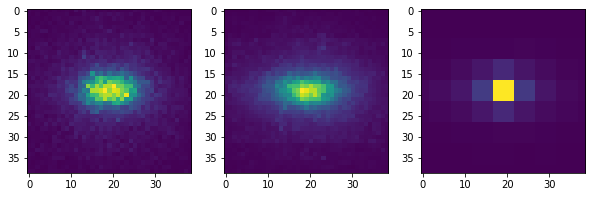

In [ ]:
fig = plt.figure(figsize=(10,10))
r = 1
c = 3
for i in range(3):
    fig.add_subplot(r,c,i+1)
    plt.imshow(np.mean(data0[:, :,:, i], axis=0))

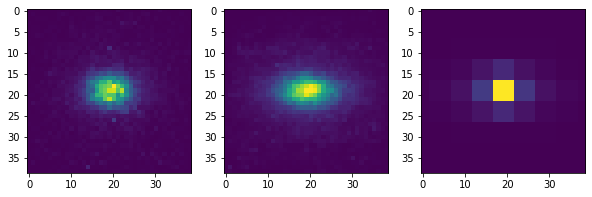

In [ ]:
fig = plt.figure(figsize=(10,10))
r = 1
c = 3
for i in range(3):
    fig.add_subplot(r,c,i+1)
    pnp.where(data['y_train'] == 0)[0]lt.imshow(np.mean(data1[:, :,:, i], axis=0))

In [ ]:
del data0, data1

X (10000, 125, 125, 3)
y (10000,)


In [10]:
data = load_dataset()

X (10000, 125, 125, 3)
y (10000,)


In [11]:
print(data['X'].shape, data['y'].shape)

(10000, 39, 39, 3) (10000,)


In [12]:
data['X'] = data['X'][:,:,:,0].reshape(-1,39,39,1)
data['X'], data['y'] = shuffle(data['X'], data['y'])

In [14]:
x_train, x_test, y_train, y_test = train_test_split(data['X'],data['y'], test_size = 0.1, random_state=4, stratify=data['y'])
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
del data

(9000, 39, 39, 1) (9000,)
(1000, 39, 39, 1) (1000,)


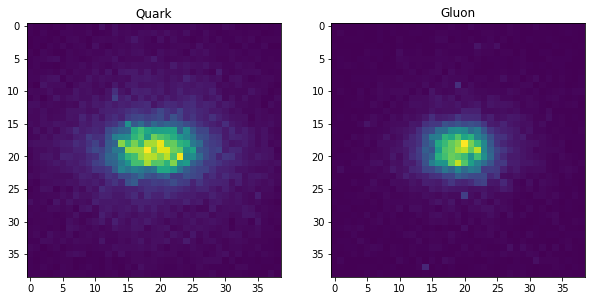

In [15]:
fig2 = plt.figure(figsize=(10,10))
r = 1
c = 2
index = [np.where(y_train == 0)[0], np.where(y_train == 1)[0]]
for i in range(2):
    fig2.add_subplot(r,c,i+1)
    plt.imshow(np.mean(x_train[index[i],:,:,0], axis=0))
    plt.title('Quark' if i == 0 else 'Gluon')

In [16]:
np.savez_compressed('/content/quark-gluon-med.npz', **{
    'x_train': x_train,
    'y_train':y_train,
    'x_test':x_test,
    'y_test':y_test
})
del x_train, x_test, y_train, y_test

In [17]:
data = np.load('/content/quark-gluon-med.npz', allow_pickle=True)

In [18]:
data['x_train'].shape

(9000, 39, 39, 1)

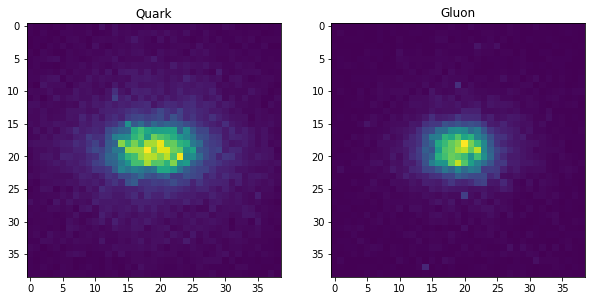

In [19]:
fig2 = plt.figure(figsize=(10,10))
r = 1
c = 2
index = [np.where(data['y_train'] == 0)[0], np.where(data['y_train'] == 1)[0]]
for i in range(2):
    fig2.add_subplot(r,c,i+1)
    plt.imshow(np.mean(data['x_train'][index[i],:,:,0], axis=0))
    plt.title('Quark' if i == 0 else 'Gluon')